In [120]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [87]:
#DATA CLEANING CELL
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data.columns))
crime_data = crime_data.drop(columns=['Vict Descent','Status','Status Desc'])
# print(len(my_data.columns))
all_c = list(crime_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
print(final)
crime_data.dropna(inplace=True,subset=final)
# my_data = my_data[my_data['LON'] != 0]
# my_data = my_data[my_data['LAT'] != 0]

print(len(crime_data))

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Crm Cd 1']
67385


In [4]:
crime_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,306.0,ROCK/THROWN OBJECT,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
17,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,624.0,NaN,NaN,PACIFIC COAST,VERMONT,33.7926,-118.3043
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,204.0,FOLDING KNIFE,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
27,200100552,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,ALAMEDA,LOS ANGELES,34.0578,-118.2371
34,200100568,01/27/2020 12:00:00 AM,01/27/2020 12:00:00 AM,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,500.0,UNKNOWN WEAPON/OTHER WEAPON,930.0,998.0,NaN,NaN,6TH,SAN JULIAN,34.0428,-118.2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,230616011,10/03/2023 12:00:00 AM,10/03/2023 12:00:00 AM,1055,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,207.0,OTHER KNIFE,230.0,998.0,NaN,NaN,VAN NESS,SANTA MONICA,34.0907,-118.3157
825114,230311153,05/20/2023 12:00:00 AM,05/20/2023 12:00:00 AM,1820,3,Southwest,356,1,210,ROBBERY,...,106.0,UNKNOWN FIREARM,210.0,NaN,NaN,NaN,WESTERN AV,JEFFERSON BL,34.0256,-118.3089
825127,231814456,08/02/2023 12:00:00 AM,07/28/2023 12:00:00 AM,2330,18,Southeast,1823,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,NaN,NaN,NaN,SAN PEDRO ST,CENTURY BL,33.9456,-118.2695
825163,232004024,01/01/2023 12:00:00 AM,01/01/2023 12:00:00 AM,1130,20,Olympic,2029,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,WILSHIRE BL,VERMONT AV,34.0618,-118.2917


In [5]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    
    #get the dependent and independent variables
    y = crime_data['Crm Cd 1']
    x = crime_data[['AREA', 'TIME OCC', 'WEAPON USED CD','']]
    
    #fit the model and get the first R^2 value
    results = RandomForestClassifier(y, X).fit()
    crit = results.rsquared
    best = [(crit,realestate.columns[2:7])]
    #loop through every possible combination of features
    for k in range(1, len(realestate.columns[2:7])+1):
        for combo in combinations(realestate.columns[2:7],k):
            
            #get the results of the model from the combination of features
            X = sm.add_constant(realestate[list(combo)].values)
            results = sm.OLS(y, X).fit()
            crit = results.rsquared
            #check if the new R^2 value is higher than the previous
            if crit > best[-1][0]:
                best.append((crit,combo))
            x = realestate[list(combo)].values
                
    return (end_1, end_2, end_3), best[-1][1]

In [6]:
crime_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,306.0,ROCK/THROWN OBJECT,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
17,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,624.0,NaN,NaN,PACIFIC COAST,VERMONT,33.7926,-118.3043
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,204.0,FOLDING KNIFE,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
27,200100552,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,ALAMEDA,LOS ANGELES,34.0578,-118.2371
34,200100568,01/27/2020 12:00:00 AM,01/27/2020 12:00:00 AM,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,500.0,UNKNOWN WEAPON/OTHER WEAPON,930.0,998.0,NaN,NaN,6TH,SAN JULIAN,34.0428,-118.2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,230616011,10/03/2023 12:00:00 AM,10/03/2023 12:00:00 AM,1055,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,207.0,OTHER KNIFE,230.0,998.0,NaN,NaN,VAN NESS,SANTA MONICA,34.0907,-118.3157
825114,230311153,05/20/2023 12:00:00 AM,05/20/2023 12:00:00 AM,1820,3,Southwest,356,1,210,ROBBERY,...,106.0,UNKNOWN FIREARM,210.0,NaN,NaN,NaN,WESTERN AV,JEFFERSON BL,34.0256,-118.3089
825127,231814456,08/02/2023 12:00:00 AM,07/28/2023 12:00:00 AM,2330,18,Southeast,1823,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,NaN,NaN,NaN,SAN PEDRO ST,CENTURY BL,33.9456,-118.2695
825163,232004024,01/01/2023 12:00:00 AM,01/01/2023 12:00:00 AM,1130,20,Olympic,2029,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,WILSHIRE BL,VERMONT AV,34.0618,-118.2917


In [99]:

df = pd.get_dummies(crime_data, columns = ['TIME OCC', 'LOCATION', 'Cross Street', 'Vict Sex',])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')


In [116]:
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['day'] = df['DATE OCC'].dt.day
df['hour'] = df['DATE OCC'].dt.hour
df['day_of_week'] = df['DATE OCC'].dt.dayofweek
columns_to_drop = []

for i in df.columns:
    if df[i].dtype!='float64' and df[i].dtype!= 'uint8' and df[i].dtype != 'int64':
        columns_to_drop.append(i)
    if re.search('Crm Cd*', i):
        columns_to_drop.append(i)
# columns_to_drop.append('Crm Cd 1')
# columns_to_drop.append('Crm Cd 2')
# columns_to_drop.append('Crm Cd 3')
# columns_to_drop.append('Crm Cd 4')
columns_to_drop.append('DR_NO')
columns_to_drop.append('Part 1-2')

columns_to_drop
#print(df['LAT'].dtype)
#print(df['TIME OCC_5'].dtype)

new_df = df.drop(columns = columns_to_drop)
new_df

# columns_to_drop

,AREA,Rpt Dist No,Vict Age,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_1,TIME OCC_2,TIME OCC_3,...,Cross Street_ZUNIGA LN,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X,year,month,day,hour,day_of_week
10,1,192,29,101.0,306.0,34.0359,-118.2648,0,0,0,...,0,0,0,1,0,2020,1,4,0,5
17,5,511,29,102.0,400.0,33.7926,-118.3043,0,0,0,...,0,1,0,0,0,2020,2,22,0,5
19,1,152,66,103.0,204.0,34.0463,-118.2550,0,0,0,...,0,0,0,1,0,2020,1,14,0,1
27,1,111,71,148.0,500.0,34.0578,-118.2371,0,0,0,...,0,0,0,1,0,2020,1,19,0,6
34,1,166,69,801.0,500.0,34.0428,-118.2461,0,0,0,...,0,0,0,1,0,2020,1,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,6,657,39,710.0,207.0,34.0907,-118.3157,0,0,0,...,0,0,0,1,0,2023,10,3,0,1
825114,3,356,17,801.0,106.0,34.0256,-118.3089,0,0,0,...,0,0,0,1,0,2023,5,20,0,5
825127,18,1823,25,101.0,400.0,33.9456,-118.2695,0,0,0,...,0,1,0,0,0,2023,7,28,0,4
825163,20,2029,40,905.0,500.0,34.0618,-118.2917,0,0,0,...,0,1,0,0,0,2023,1,1,0,6


12819


In [96]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

rf = RandomForestClassifier()
param_grid = {'n_estimators': [50,100], "criterion": ['gini','entropy'], "max_features": [None,'sqrt','log2'], 'max_depth': [5,10]}

rf_gs = GridSearchCV(rf,param_grid,cv = 3, n_jobs = -1)
rf_gs.fit(X_train, y_train)
#display the best parameters and your score
print(f'Best Parameters: {rf_gs.best_params_}')
print(f'Best Score: {rf_gs.best_score_}')

#get the predicted labels and display your confusion matrix
# rf_predicted = rf_gs.predict(X_test)
# CM = confusion_matrix(y_test, rf_predicted)
# print(f'Confusion Matrix:\n {CM}')

/Users/jeddybennett/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KeyboardInterrupt: 

In [128]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(crime_data['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

sel = SelectFromModel(RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100))
sel.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=10))

In [135]:
X_selected = sel.fit_transform(X_train, y_train)


In [141]:
X_selected = X_selected.astype(int)

In [1]:
y_test.max

NameError: name 'y_test' is not defined

In [129]:
sel.get_support()

array([ True,  True,  True, ...,  True, False,  True])

In [ ]:
selected_feat = X_train.columns[(sel.get_support())]
X = X_train[selected_feat]

# X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

rf = RandomForestClassifier() 
rf.fit(X_selected, y_train)

y_pred = rf.predict(X_test[selected_featcted_feat])


accuracy = accuracy_score(y_test, y_pred)


In [ ]:
accuracy

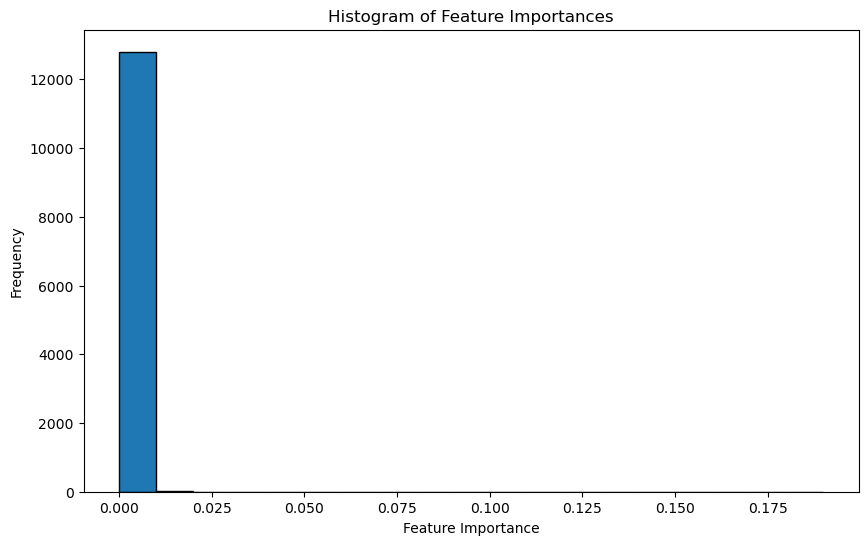

In [124]:
importance = pd.Series(sel.estimator_.feature_importances_)
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(importance, bins=np.arange(0, 0.2, 0.01), edgecolor='black')
plt.title('Histogram of Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Frequency')
plt.show()

In [16]:
#X = crime_data[['TIME OCC', 'AREA', 'Weapon Used Cd', 'Premis Cd', 'Rpt Dist No']]
X = crime_data[['Weapon Used Cd']]
y = crime_data['Crm Cd 1']
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.4421745152354571


In [12]:
pd.Series(sel.estimator_.,rf.feature_importances_,rf.ravel()).hist()

AttributeError: 'SelectFromModel' object has no attribute 'estimator_'